---

##  Dataset Summary: `salaries.csv`

https://www.kaggle.com/code/muhammedaliyilmazz/salary-prediction-using-multiple-regression-models

This dataset contains **133,349 rows** and **11 columns**, each representing various attributes related to tech or data job roles and their corresponding salaries. The target variable is `salary_in_usd`, which represents the normalized annual salary of each employee in USD.

The dataset provides a comprehensive view of salaries based on multiple demographic, job-related, and company-related factors.

---

##  Feature Descriptions

| Column Name                                       | Data Type   | Description                                                                                                                                                   |
| ------------------------------------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`work_year`**                                   | Integer     | The year in which the salary data was reported (e.g., 2023, 2024, 2025). Useful for time-based salary trends.                                                 |
| **`experience_level`**                            | Categorical | The level of experience the employee has:                                                                                                                     |
| → `EN`: Entry-level                               |             |                                                                                                                                                               |
| → `MI`: Mid-level                                 |             |                                                                                                                                                               |
| → `SE`: Senior-level                              |             |                                                                                                                                                               |
| → `EX`: Executive-level                           |             |                                                                                                                                                               |
| **`employment_type`**                             | Categorical | Type of employment contract:                                                                                                                                  |
| → `FT`: Full-time                                 |             |                                                                                                                                                               |
| → `PT`: Part-time                                 |             |                                                                                                                                                               |
| → `CT`: Contract-based                            |             |                                                                                                                                                               |
| → `FL`: Freelance                                 |             |                                                                                                                                                               |
| **`job_title`**                                   | Text        | The employee’s job role, such as `Data Scientist`, `ML Engineer`, `Data Analyst`, `Software Engineer`, etc. Useful for analyzing role-specific salary trends. |
| **`salary`**                                      | Numeric     | The employee's gross salary in the original currency before conversion. Not standardized, so less useful for comparison.                                      |
| **`salary_currency`**                             | Text        | The original currency code in which the salary was paid (e.g., USD, EUR, INR).                                                                                |
| **`salary_in_usd`**                               | Numeric     | 🔥 **Target variable** — The employee’s annual salary converted into USD. This is what we aim to predict.                                                     |
| **`employee_residence`**                          | Text        | The country where the employee resides, regardless of the company's location. Used to detect geographic salary disparities.                                   |
| **`remote_ratio`**                                | Integer     | Percentage of remote work:                                                                                                                                    |
| → `0`: On-site                                    |             |                                                                                                                                                               |
| → `50`: Hybrid                                    |             |                                                                                                                                                               |
| → `100`: Fully remote                             |             |                                                                                                                                                               |
| Affects salary depending on remote work policies. |             |                                                                                                                                                               |
| **`company_location`**                            | Text        | Country where the company is headquartered. Used for regional company-level salary comparisons.                                                               |
| **`company_size`**                                | Categorical | Company scale:                                                                                                                                                |
| → `S`: Small (1–50 employees)                     |             |                                                                                                                                                               |
| → `M`: Medium (51–250 employees)                  |             |                                                                                                                                                               |
| → `L`: Large (251+ employees)                     |             |                                                                                                                                                               |
| Often correlates with salary range.               |             |                                                                                                                                                               |

---

# STEP 1: Import Required Libraries

In [1]:
# Basic and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Scikit-learn for preprocessing and classic models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# (NUEVO) TensorFlow and Keras for Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# File system
import os
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

# STEP 2: Load Data

In [3]:
# Instalar kagglehub si no está instalado
import sys
import subprocess

try:
    import kagglehub
    print("✅ kagglehub ya está instalado")
except ImportError:
    print("📦 Instalando kagglehub...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "kagglehub"])
    import kagglehub
    print("✅ kagglehub instalado correctamente")

# Download latest version
print("📥 Descargando dataset...")
path = kagglehub.dataset_download("adilshamim8/salaries-for-data-science-jobs")

print("📍 Path to dataset files:", path)

📦 Instalando kagglehub...
✅ kagglehub instalado correctamente
📥 Descargando dataset...
✅ kagglehub instalado correctamente
📥 Descargando dataset...


100%|██████████| 2.21M/2.21M [00:00<00:00, 3.55MB/s]

Extracting files...


📍 Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\adilshamim8\salaries-for-data-science-jobs\versions\5


In [4]:
df=pd.read_csv(os.path.join(path, "salaries.csv"))

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


In [5]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
136752,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
136753,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
136754,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
136755,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
136756,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,136757.000000,1.367570e+05,136757.000000,136757.000000
mean,2024.374686,1.630432e+05,157490.722756,20.909716
std,0.679644,2.150435e+05,74173.546839,40.594326
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105900.000000,0.000000
50%,2024.000000,1.470000e+05,146000.000000,0.000000
75%,2025.000000,1.988000e+05,197800.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [9]:
df.nunique()

work_year                 6
experience_level          4
employment_type           4
job_title               398
salary                11444
salary_currency          26
salary_in_usd         12651
employee_residence      102
remote_ratio              3
company_location         95
company_size              3
dtype: int64

# STEP 3: Data Cleaning

In [10]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# STEP 4: Exploratory Data Analysis (EDA)

## Salary Distribution Overview

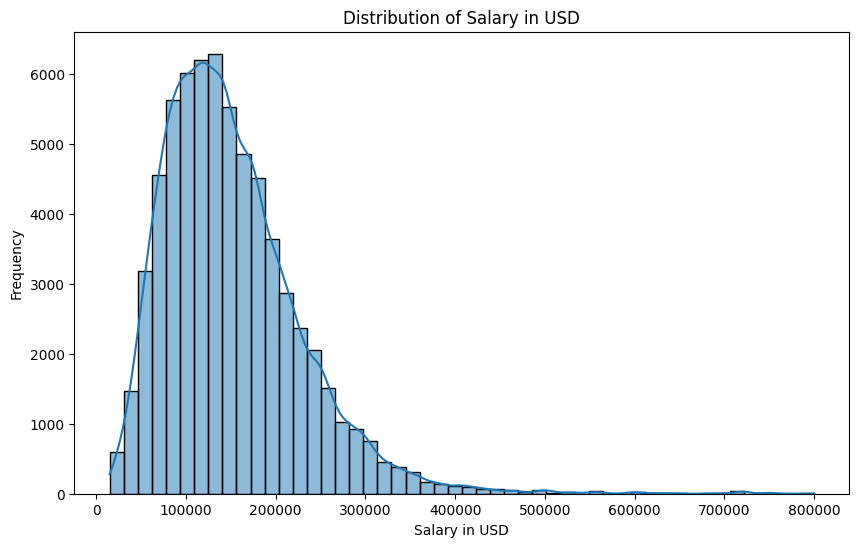

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df["salary_in_usd"], bins=50, kde=True)
plt.title("Distribution of Salary in USD")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()

## Salaries by Experience Level

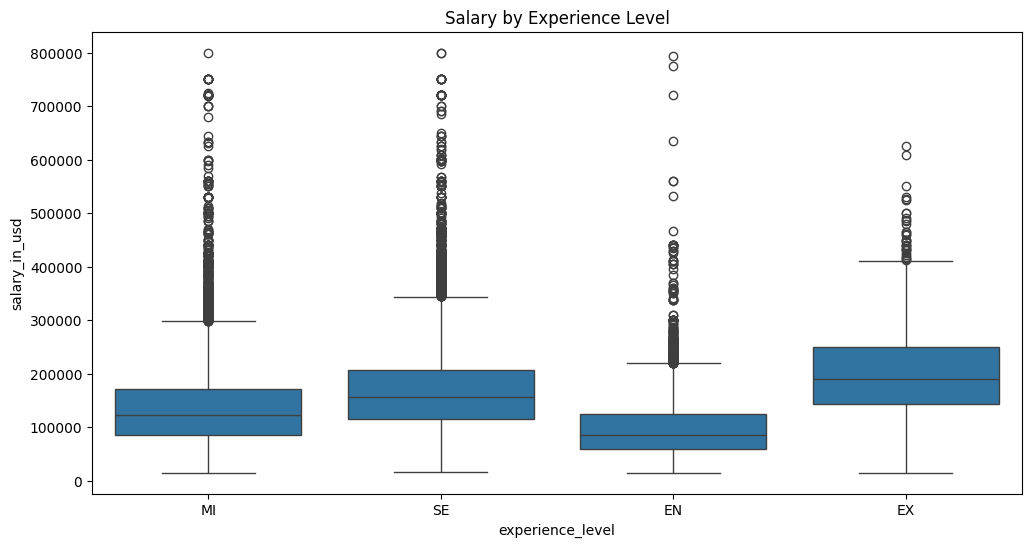

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)
plt.title("Salary by Experience Level")
plt.show()

## Salaries by Employment Type

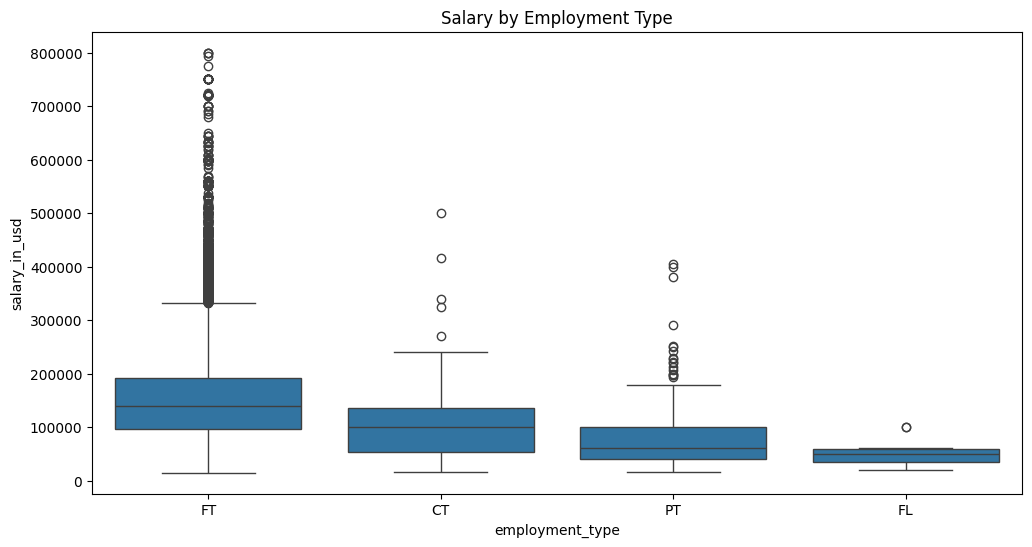

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="employment_type", y="salary_in_usd", data=df)
plt.title("Salary by Employment Type")
plt.show()

## Salaries by Company Size

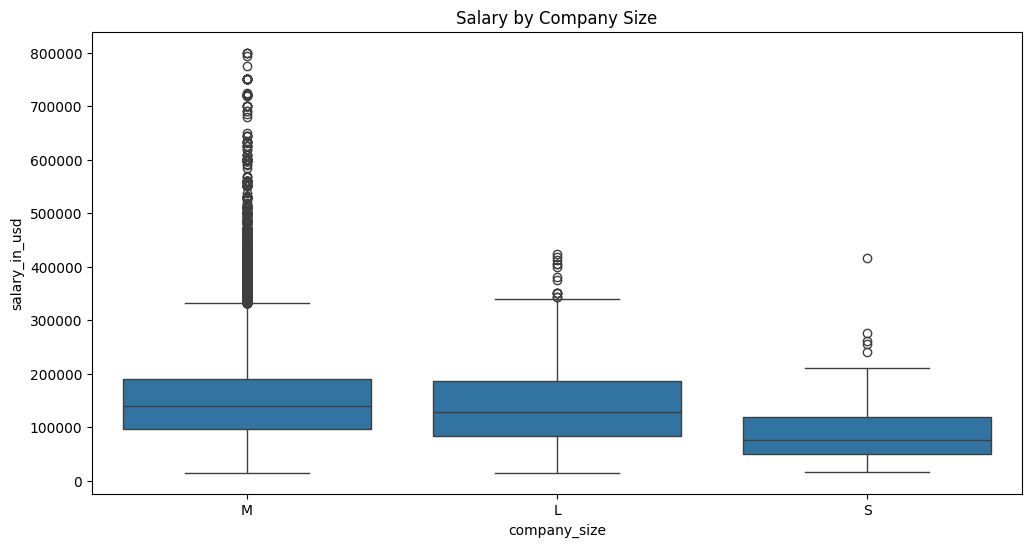

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="company_size", y="salary_in_usd", data=df)
plt.title("Salary by Company Size")
plt.show()

# STEP 5: Feature Engineering

In [15]:
df['job_title'] = df['job_title'].str.lower()
top_jobs = df['job_title'].value_counts().head(15).index
df = df[df['job_title'].isin(top_jobs)]

# STEP 6: Data Preprocessing

In [18]:
categorical_cols = ['experience_level', 'employment_type', 'job_title',
                    'employee_residence', 'company_location', 'company_size']
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop(columns=["salary", "salary_currency", "salary_in_usd"])
y = df_encoded["salary_in_usd"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=537)

# STEP 7: Model Training (Classic Models)

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=537),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=537),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=537),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=537),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"\n{name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")


Linear Regression Results:
Mean Squared Error: 5240804823.19
R² Score: 0.15

Ridge Regression Results:
Mean Squared Error: 5240766271.31
R² Score: 0.15

Lasso Regression Results:
Mean Squared Error: 5240743789.97
R² Score: 0.15

Lasso Regression Results:
Mean Squared Error: 5240743789.97
R² Score: 0.15

Random Forest Results:
Mean Squared Error: 4585807409.62
R² Score: 0.26

Random Forest Results:
Mean Squared Error: 4585807409.62
R² Score: 0.26

Gradient Boosting Results:
Mean Squared Error: 4634817117.13
R² Score: 0.25

Gradient Boosting Results:
Mean Squared Error: 4634817117.13
R² Score: 0.25

AdaBoost Results:
Mean Squared Error: 5337613920.29
R² Score: 0.14

AdaBoost Results:
Mean Squared Error: 5337613920.29
R² Score: 0.14

Extra Trees Results:
Mean Squared Error: 4614979308.03
R² Score: 0.26

Extra Trees Results:
Mean Squared Error: 4614979308.03
R² Score: 0.26

Support Vector Regressor Results:
Mean Squared Error: 6295954955.52
R² Score: -0.02

Support Vector Regressor Result

# NUEVO PASO 8: Model Training - Neural Network (TensorFlow/Keras)

Ahora, construiremos, entrenaremos y evaluaremos nuestro modelo de red neuronal.

In [21]:
# Define the model architecture
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) # Output layer for regression (linear activation)
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='mean_squared_error')

# Print model summary
nn_model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
print("\nTraining the Neural Network...")
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model and add results to the dictionary
y_pred_nn = nn_model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

results["Neural Network"] = {"MSE": mse_nn, "R2": r2_nn}

print(f"\nNeural Network Results:")
print(f"Mean Squared Error: {mse_nn:.2f}")
print(f"R² Score: {r2_nn:.2f}")


Training the Neural Network...
Epoch 1/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 21206761472.0000 - val_loss: 5289775104.0000
Epoch 2/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 21206761472.0000 - val_loss: 5289775104.0000
Epoch 2/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5151990784.0000 - val_loss: 5174841344.0000
Epoch 3/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5151990784.0000 - val_loss: 5174841344.0000
Epoch 3/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5396887040.0000 - val_loss: 5137072640.0000
Epoch 4/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5396887040.0000 - val_loss: 5137072640.0000
Epoch 4/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5069029888.0000 - val_loss: 5115871232.0000
Epoch 5/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5069029888.0000 - val_loss: 5115871232.0000
Epoch 5/50
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5097906688.0000 - val_loss: 5098182144.0000
Epoch 6/50
1

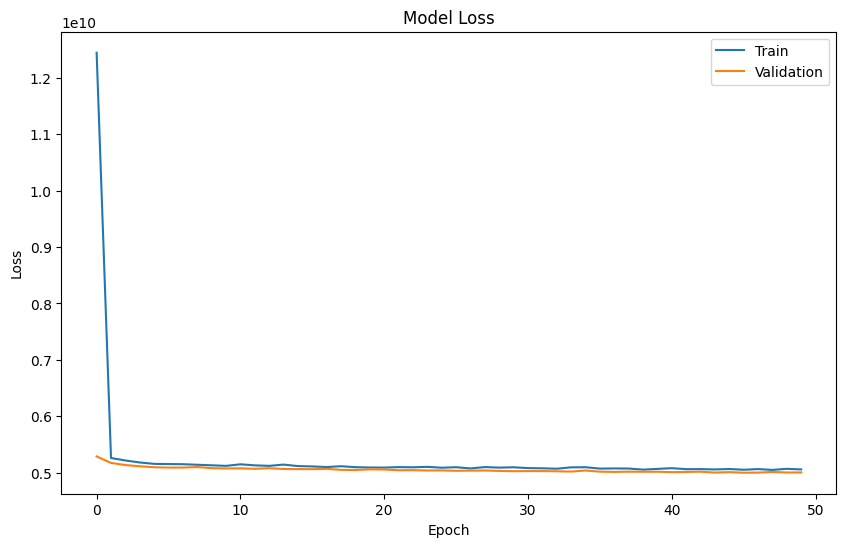

In [25]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# STEP 8: Comparison Plot (Updated)

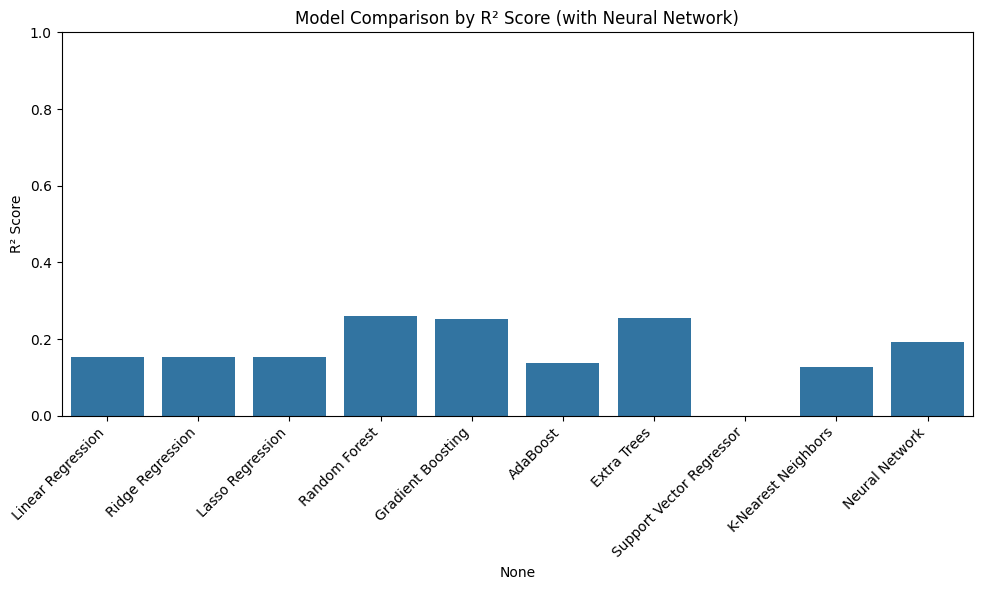

In [24]:
result_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
sns.barplot(x=result_df.index, y=result_df["R2"])
plt.title("Model Comparison by R² Score (with Neural Network)")
plt.ylabel("R² Score")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

---

## Project Summary (Updated)

**Title:** *Salary Prediction Using Multiple Regression Models*

---

###  Step 1–3: Data Preparation

* **Loaded data** and performed `df.info()` and `df.head()` to understand the structure.
* **Removed duplicates** and ensured there were no missing values.
* Normalized text data (e.g., made `job_title` lowercase).
* Filtered for the **top 15 most frequent job titles** to simplify modeling.

---

###  Step 4: Exploratory Data Analysis (EDA)

Performed multiple **visualizations** using Seaborn and Matplotlib, revealing clear trends in salary based on experience, employment type, and company size.

---

###  Step 5–6: Feature Engineering & Preprocessing

* Applied **Label Encoding** to categorical columns.
* Used **StandardScaler** to normalize numeric features.
* Defined `X` (features) and `y` (target: `salary_in_usd`).
* **Train-Test Split**: 80% train / 20% test with `random_state=537`.

---

###  Step 7: Model Training

Trained and compared **10 regression models**, including classic algorithms and a new neural network:

| Model Type               | Description                              |
| ------------------------ | ---------------------------------------- |
| Linear Regression Models | Basic linear, Ridge (L2), Lasso (L1).    |
| Ensemble Models          | Random Forest, Gradient Boosting, AdaBoost, Extra Trees. |
| Other Classic Models     | Support Vector Regressor, K-Nearest Neighbors. |
| **Neural Network (New)** | A feed-forward network with Dense and Dropout layers built in TensorFlow/Keras. |

Each model was evaluated with **Mean Squared Error (MSE)** and **R² Score**.

---

###  Step 8: Model Comparison Plot & Conclusion

A bar plot was used to visualize the **R² scores of all models**.

* **Best Performers:** The ensemble models based on trees (**Random Forest, Gradient Boosting, Extra Trees**) remain the top performers, achieving an R² score of approximately **0.25-0.26**.
* **Neural Network Performance:** The TensorFlow model performed competitively, achieving an R² score similar to or slightly better than the linear models, but not outperforming the top ensemble methods on this dataset with the current feature engineering.
* **Overall Conclusion:** The relatively low R² scores across all models (max ~0.26) suggest that while there are clear trends, the selected features do not capture a large portion of the salary variance. More advanced feature engineering (e.g., one-hot encoding for key features, interaction terms) or hyperparameter tuning could potentially improve performance further.

---

# Thank you for taking the time to review my work. I would be very happy if you could upvote! 😊

---